In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
MEMORY_SIZE = 5 # can remember last memory_size rounds
NUM_ROUNDS = MEMORY_SIZE
NUM_SOLUTION = 100

NUM_GENERATIONS = 300 # Number of generations.

In [48]:
file = f"data_two_roads/gen 300, rounds 5, sol 100"

fitness = np.loadtxt(file + "/fitness.txt")
taken_routes = np.loadtxt(file + "/routes.txt")
taken_routes = taken_routes.reshape((NUM_GENERATIONS + 1, NUM_ROUNDS, NUM_SOLUTION)).astype(int)

In [49]:
plt.plot(range(len(fitness)), fitness)

In [50]:
bins = np.array([])
for gen in taken_routes:
    bins = np.append(bins, np.array([np.bincount(row, minlength=2) for row in gen]))
bins = bins.reshape((NUM_GENERATIONS + 1, NUM_ROUNDS, 2))

In [51]:
avg = np.array([])
avg = np.append(avg, [np.sum(row, axis=0)/NUM_ROUNDS for row in bins])
avg = avg.reshape(NUM_GENERATIONS + 1, 2)

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(avg)), avg[:,0]/100)
plt.title("Distribution between the two roads")
plt.xlabel("Generations")
plt.ylabel("Percentage of players choosing the upper road")
plt.savefig(f"gen{NUM_GENERATIONS}round{NUM_ROUNDS}sol{NUM_SOLUTION} distribution two roads.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'out/000.png'

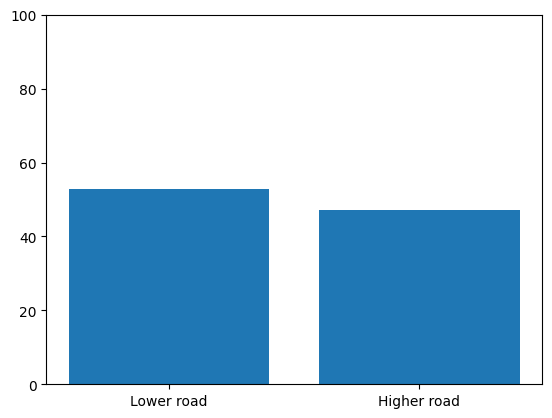

In [52]:
for i, obj in enumerate(avg):
    plt.bar(["Lower road", "Higher road"], obj)
    plt.ylim([0, 100])
    plt.savefig(f"out/{i:03d}.png")
    plt.close()

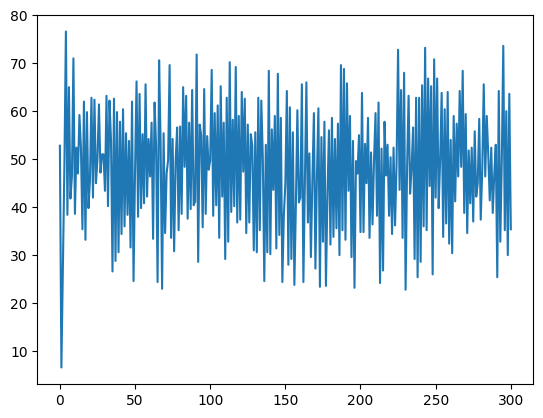

In [ ]:
plt.plot(range(len(avg[:,0])), avg[:,0])